# Preliminary Individual EDA

## Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Purpose

This notebook is to explore the given data set individually to set the stage for group work discussion for the end of module 1 project of Flatiron School Data Science Immersive 091420-Manhattan Cohorrt. The notebook will serve as both code reference in the future and surface level data exploration of the given data set.

## Goal

The provided data set are series of information regarding movies. They will be explored to provide insight into current trend and success parameters to recommend a future course of movie creation of Microsoft Movie Studios. 

## Structure

The data set can be found in `./data` folder 
<br>
The data is pulled from following companies: 

- Box Office Mojo (prefix: bom)
- IMDB (prefix: imdb)
- Rotten Tomatoes (prefix: rt) (does not provide movie title?)
- TheMoiveDB.org (prefix: tmdb) (very confusing with imdb...)

## Initial Questions

- What studio has the best record in terms of margins/reviews? (Who to copy?)

- Which director has the best record in terms of margins/reviews

- What is the correlation between the budget and earnings
    - Larger production value tend to earn more profits, but there is a fall off point after 1mil

- What genre performs best?
    - among the top rated and most earning movies Drama was the most common followed by Action then Adventure
    - among the movies with best profit to budget ratio Drama had the overwhelming majority. Comedy, Horror, and Thrillers were also among the top genres

- Is there a genre that has been gaining more popularity?

- Is there a genre that performs the best for the money?


## Findings Summary

#### According to The Numbers (TN) data set
- The movie budget gas a positive correlation to the gross numbers.
- If a movie does well in domestic market, it is very likely to do well in worldwide market (0.94!)

#### According to Rotten Tomatoes (RT) data set
- The movie runtime has very little correlation to the review


### Contribution
Author - Yung Han Jeong
<br>
Team Member - Cierra Andaur

#### Library Import

In [1]:
import os
import pandas as pd
import numpy as np
import src.tools as tl
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
!ls data

bom.movie_gross.csv.gz        imdb.title.ratings.csv.gz
i_tn_profit_clean.csv         imdb.title_rating_summary.csv
imdb.name.basics.csv.gz       rt.movie_info.tsv.gz
imdb.title.akas.csv.gz        rt.reviews.tsv.gz
imdb.title.basics.csv.gz      tmdb.movies.csv.gz
imdb.title.crew.csv.gz        tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz  tn.profit_movie_budgets.csv


<h2 align="center"> ALL DATA IMPORT </h2>

In [592]:
#----------------Box Office Mojo------------------------------#
bom_df = pd.read_csv("data/bom.movie_gross.csv.gz") #title, studio, domestic gross(float), foreign_gross(object), year(int)

#-----------------------IMDB----------------------------#
i_basic_df = pd.read_csv("data/imdb.name.basics.csv.gz") #people basic info
i_aka_df = pd.read_csv("data/imdb.title.akas.csv.gz") #movie title alternative/foreign name
i_title_basic_df = pd.read_csv("data/imdb.title.basics.csv.gz") #movie title basic info
i_crew_df = pd.read_csv("data/imdb.title.crew.csv.gz") #crew info by nconst
i_principal_df = pd.read_csv("data/imdb.title.principals.csv.gz") #principal people of the movie
i_rating_df = pd.read_csv("data/imdb.title.ratings.csv.gz") #rating and number of votes by tconst


#-----------------------Rotten Tomato---------------------------#
#Shoutout to Tim Hintz and Eric Roberts!
rt_info_df = pd.read_csv("data/rt.movie_info.tsv.gz", delimiter = "\t", encoding='ISO-8859-1' ) #reviews and info
rt_review_df = pd.read_csv("data/rt.reviews.tsv.gz", delimiter = "\t", encoding='ISO-8859-1' ) #reviews by critics

#--------------------The Movie Database -------------------#
tmdb_df = pd.read_csv("data/tmdb.movies.csv.gz") #summary of movie info

#-------------------The Numbers---------------------------------#
tn_df = pd.read_csv("data/tn.movie_budgets.csv.gz") #movie release date, title, budget, gross
tn_profit_df = pd.read_csv("data/tn.profit_movie_budgets.csv", index_col = 0) #filterd dataset of above with movies that only made profit

#---------------------Merged Datasets---------------------------#
i_sum_df = pd.read_csv("data/imdb.title_rating_summary.csv", index_col = 0)
i_tn_profit_df = pd.read_csv("data/i_tn_profit_clean.csv", index_col = 0)


print("All DataFrame Loaded")

All DataFrame Loaded


<h2 align="center">Gross and Normalized Profit Per Genre From 2010-2018</h2>

This analysis will utilize `i_tn_profit_clean.csv` which is a combined and cleaned dataset of IMDB and TheNumbers.com data. The genres column IMDB data contains the up to 3 genre tags per title. That column will be filtered through `unpack_genre` method from `src/tools.py` to obtain a dictionary which contains key:value pairs of genre:frequency. The genres columns will also be expanded to separate each tags as separate genre columns (genre1, genre2, genre3) for further grouped analysis. 


### Questions
- Which genre performs overall the best?
- Which genre performs best per title?
- Are there a growing or diminishing trend in genres?



#### Genre Performance 
Get each genres frequency in genres column separated into each tag and evaluate gross profit and normalized profit of each genre tags

In [343]:
#get unique genre tag set 
profit_group_genres = tl.unpack_genre(list(i_tn_profit_df.genres.dropna()))
profit_group_genres

{'western': 4,
 'musical': 5,
 'war': 8,
 'documentary': 21,
 'sport': 22,
 'history': 25,
 'music': 36,
 'family': 74,
 'biography': 88,
 'animation': 93,
 'mystery': 93,
 'fantasy': 96,
 'sci-fi': 100,
 'horror': 117,
 'romance': 141,
 'crime': 153,
 'thriller': 180,
 'adventure': 298,
 'action': 325,
 'comedy': 393,
 'drama': 475}

As can be seen above western, musical, and war genres do not contain significant amounts of data for good comparison. These columsn will be dropped for further analysis in the future.
<br>
<br>
#### Expanding Genres Columns

In [384]:
i_tn_profit_df[["genre1", "genre2", "genre3"]] = i_tn_profit_df.genres.str.split(",", expand = True)

In [385]:
#sanity check
#i_tn_profit_df.head()

In [386]:
genre1_profit = i_tn_profit_df.groupby("genre1").sum()[["domestic_profit", "worldwide_profit"]]
genre2_profit = i_tn_profit_df.groupby("genre2").sum()[["domestic_profit", "worldwide_profit"]]
genre3_profit = i_tn_profit_df.groupby("genre3").sum()[["domestic_profit", "worldwide_profit"]]

Obtain total profit per genre using calculation above

In [387]:
genre_total = genre1_profit.add(genre2_profit, fill_value=0).add(genre3_profit, fill_value =0)

Drop low population data for more insightful analysis

In [388]:
genre_total.drop(["Musical", "Western", "War"], inplace = True)

genre_count dataframe can be created from the dictionary above for normalizing the total profit values

In [389]:
#Create Genre Count from dictionary above and reformat index
genre_count = pd.Series(profit_group_genres)
genre_count = genre_count.reset_index()
genre_count["index"] = genre_count["index"].apply(lambda txt: txt.title()) #titlize the output 
genre_count.set_index("index", inplace = True)
genre_count.sort_index(inplace = True)
genre_count.drop(["Musical", "Western", "War"], inplace = True) #drop same columns as above

In [390]:
#normalize data
genre_total["norm_domestic"] = genre_total["domestic_profit"]/genre_count[0]
genre_total["norm_worldwide"] = genre_total["worldwide_profit"]/genre_count[0]

#### Plot Total Gross and Normalize Data

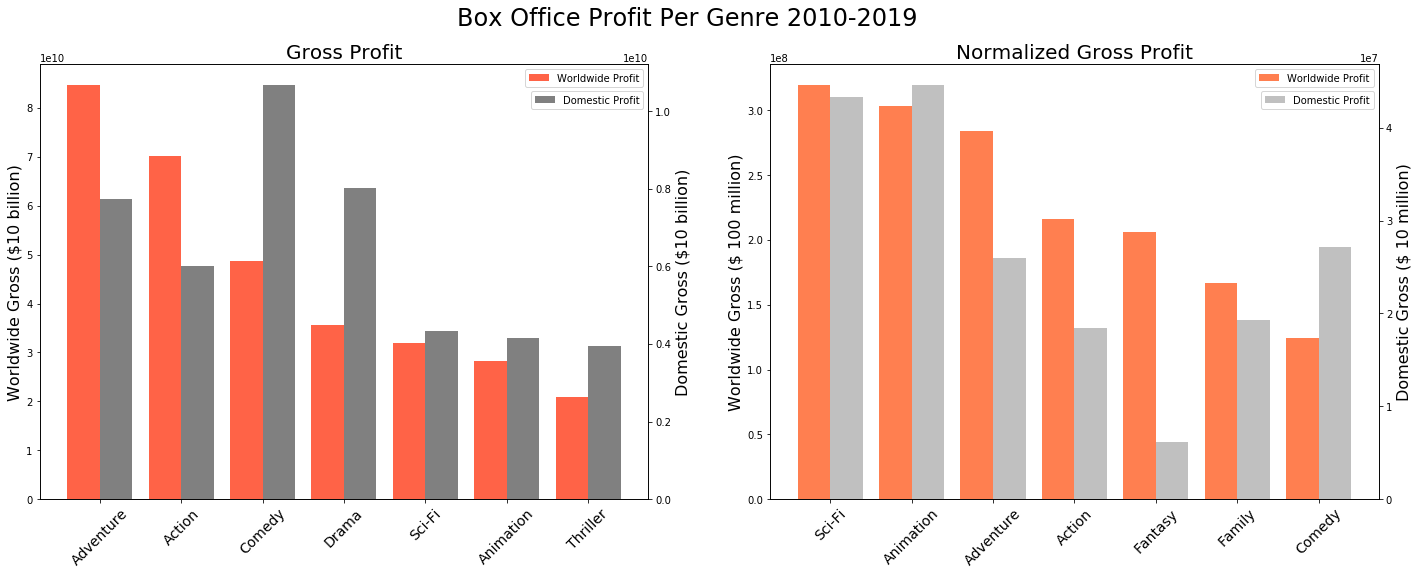

In [411]:
#Set Figure Size
plt.figure(figsize=(24,8))

#Set top data slicing value total number of top ranks to plot
graphrank = 7 #must be less than or equal to the length of the genre_total


#------------------------GENRE TOTAL PLOT------------------------#
#sort and slice before plotting
plot_total = genre_total.sort_values("worldwide_profit", ascending = False)
plot_total = plot_total[:graphrank]

#set first bar graph x positions and width
ax = plt.subplot(1,2,1) #set figure position
ax2 = ax.twinx() #set twin x axis
xpos = np.array(range(0,len(plot_total))) #xpos for barset
width = 0.4 #set bar width for offset

#bar plot both domestic and worldwide gross based on genre
domestic = ax2.bar(xpos+width/2, plot_total["domestic_profit"].values, width, label = "Domestic Profit", color = "grey")
worldwide = ax.bar(xpos-width/2, plot_total["worldwide_profit"].values, width, label = "Worldwide Profit", color = "tomato")

#set x axis markers
ax.set_xticks(xpos);
ax.set_xticklabels(plot_total.index, rotation = 45, size=14);

#set labels
ax.set_ylabel("Worldwide Gross ($10 billion)", size=16);
ax2.set_ylabel("Domestic Gross ($10 billion)", size=16);
ax.set_title("Gross Profit", size=20)

#set legend
ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")
ax2.legend(bbox_to_anchor=(0,-.05,1,1), loc="upper right")

#-----------------NORMALIZED GENRE PROFIT PLOT----------------------------#
#sort and slice before plotting
plot_norm = genre_total.sort_values("norm_worldwide", ascending = False)
plot_norm = plot_norm[:graphrank]

#set second plot x positions
ax3 = plt.subplot(1,2,2) #set figure position
ax4 = ax3.twinx() #set twin x axis
xpos = np.array(range(0,len(plot_norm))) #xpos for barset
width = 0.4 #set bar width for offset



#bar plot both domestic and worldwide gross based on genre
domestic = ax4.bar(xpos+width/2, plot_norm["norm_domestic"].values, width, label = "Domestic Profit", color = "silver")
worldwide = ax3.bar(xpos-width/2, plot_norm["norm_worldwide"].values, width, label = "Worldwide Profit", color = "coral")

#set x axis markers
ax3.set_xticks(xpos);
ax3.set_xticklabels(plot_norm.index, rotation = 45, size=14);

#set labels
ax3.set_ylabel("Worldwide Gross ($ 100 million)", size=16);
ax4.set_ylabel("Domestic Gross ($ 10 million)", size=16);
ax3.set_title("Normalized Gross Profit", size=20)

#set legend
ax3.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")
ax4.legend(bbox_to_anchor=(0,-.05,1,1), loc="upper right")
plt.suptitle("Box Office Profit Per Genre 2010-2019", size = 24)

#--------------------------SAVE IMAGE--------------------------#
#Please only uncomment if you wish to save the image
#plt.savefig("images/norm_gross_sbs_profit_genre.png")

plt.show()

As can be seen above, Sci-Fi and Animation takes the top place in normalized profit per genre with Adventure and Action following behind. Comey and Drama falls quickly behind in Worldwide market, but still maintains strong domestic presence as expected form earlier analysis. Fantasy genre gained considerable ranking, but this is most likely due to recent huge success in fantasy films such as Harry Potter. 

#### Genre trend from 2010-2018
Genre Trend will be analyzed only between 2010-2018, since 2019 has far less population than rest of the group

In [485]:
#Initialize empty dataframe to store results
genre_yearly_count = pd.DataFrame()
#get range of years from the dataset to analyze
year_range = sorted(list(i_tn_profit_df.release_year.unique()))

#for every year in the year range
for year in year_range:
    #get each genre tag's appearance per genre columns
    yearly_count1 = i_tn_profit_df[i_tn_profit_df["release_year"] == year].groupby("genre1")["primary_title"].nunique()
    yearly_count2 = i_tn_profit_df[i_tn_profit_df["release_year"] == year].groupby("genre2")["primary_title"].nunique()
    yearly_count3 = i_tn_profit_df[i_tn_profit_df["release_year"] == year].groupby("genre3")["primary_title"].nunique()
    
    #add up the results for total genre appearance of that year. Use 0 for unavailable data
    yearly_count = yearly_count1.add(yearly_count2, fill_value = 0).add(yearly_count3, fill_value = 0)
    
    #concatenate the results before looping again
    genre_yearly_count = pd.concat([genre_yearly_count, yearly_count], axis=1, sort=True)

#set column names to the year range
genre_yearly_count.columns = year_range
#drop 2019 due to incomplete/low data
genre_yearly_count.drop(columns=2019, inplace = True)
#fill NaN values with 0 for plotting
genre_yearly_count.fillna(0, inplace = True)

Transposing the data to flip the index and columns, which will make more sense for visualization. Also dropping the 3 outlier genres: Musical, War, and Western. This results in 18 total genres to analyze. 

In [495]:
genre_yearly_count = genre_yearly_count.transpose().drop(columns = ["Musical", "War","Western"])

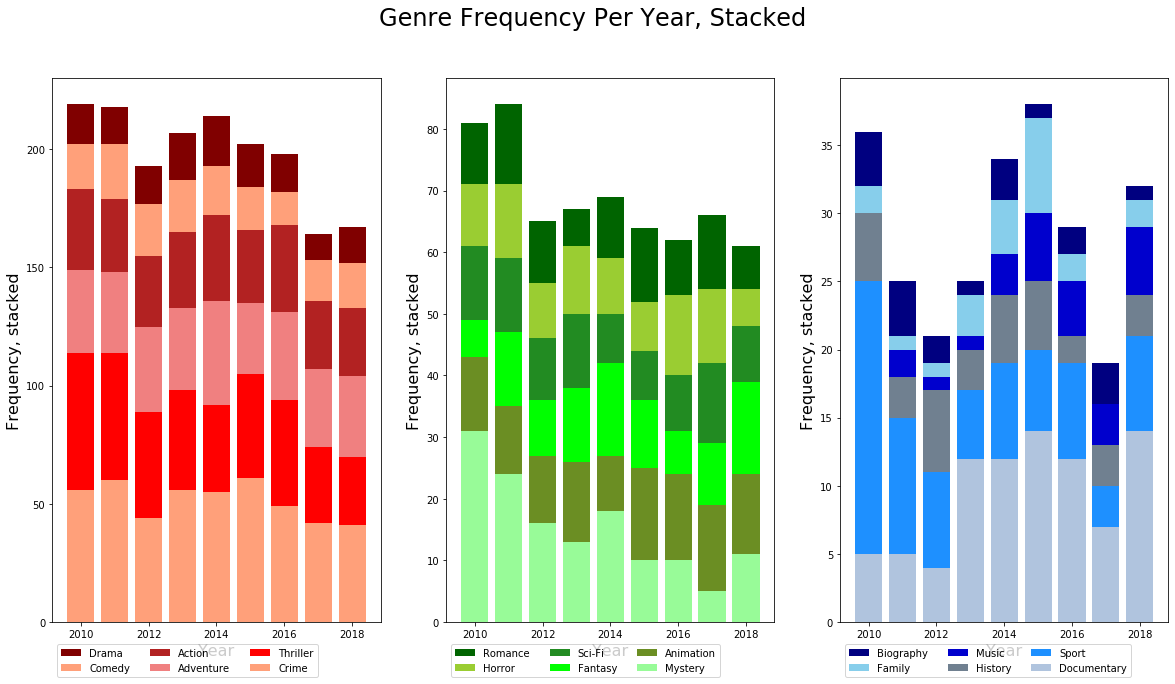

In [649]:
#set figure size
plt.figure(figsize=(20,10))

#rank each genre to plot, defined number of subplots and get division count
ranked_genre = genre_yearly_count.mean().sort_values(ascending = False).index


#------------------------------first subplot----------------------------------------#
ax = plt.subplot(1,3,1)
axdata = genre_yearly_count[ranked_genre[:6]]
axlabel = list(axdata.columns)

#prettifying
axcolor = ["lightsalmon","red","lightcoral","firebrick","lightsalmon","maroon"]

#this list is used for indexing the data total backwards to draw stacked bar-graph
barrange1 = list(range(0,len(axdata.columns)))[::-1]

#use for loop to label each line
for idx, data in zip(barrange1,axdata):
    plotheight = axdata.iloc[:,:idx+1].sum(axis=1)
    ax.bar(axdata.index, plotheight, label=data, color=axcolor[idx])
ax.legend(bbox_to_anchor=(0,-0.11,1,1), loc="lower left",ncol=3)

#axis label
ax.set_ylabel("Frequency, stacked", size=16)
ax.set_xlabel("Year", size=16)

#------------------------------second subplot--------------------------------------#
ax2 = plt.subplot(1,3,2)
ax2data = genre_yearly_count[ranked_genre[6:12]]
ax2label = list(ax2data.columns)

#prettifying
ax2color = ["palegreen","olivedrab","lime","forestgreen","yellowgreen","darkgreen"]

#this list is used for indexing the data total backwards to draw stacked bar-graph
barrange2 = list(range(0,len(ax2data.columns)))[::-1]

#use for loop to label each line
for idx, data in zip(barrange2,ax2data):
    plotheight = ax2data.iloc[:,:idx+1].sum(axis=1)
    ax2.bar(ax2data.index, plotheight, label=data,color=ax2color[idx])
ax2.legend(bbox_to_anchor=(0,-0.11,1,1), loc="lower left",ncol=3)

#axis label
ax2.set_ylabel("Frequency, stacked", size=16)
ax2.set_xlabel("Year", size=16)
    
#-------------------------------third subplot--------------------------------------#
ax3 = plt.subplot(1,3,3)
ax3data = genre_yearly_count[ranked_genre[12:]]
ax3label = list(ax3data.columns)

#prettifying
ax3color = ["lightsteelblue","dodgerblue","slategrey","mediumblue","skyblue","navy"]


#this list is used for indexing the data total backwards to draw stacked bar-graph
barrange3 = list(range(0,len(ax3data.columns)))[::-1]
#use for loop to label each line
for idx, data in zip(barrange3, ax3data):
    plotheight = ax3data.iloc[:,:idx+1].sum(axis=1)
    ax3.bar(ax3data.index, plotheight, label=data, color=ax3color[idx])
ax3.legend(bbox_to_anchor=(0,-0.11,1,1), loc="lower left",ncol=3)

#axis label
ax3.set_ylabel("Frequency, stacked", size=16)
ax3.set_xlabel("Year", size=16)

#Plot Super title
plt.suptitle("Genre Frequency Per Year, Stacked", size = 24)

#Only run the bottom code to save the plot!
#plt.savefig("images/genre_peryear_stacked.png")

plt.show()

### Studios and profit

In [423]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [424]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


<h2 align="center"> MERGE IMDB </h2>

In [98]:
i_sum_df.head()

,Unnamed: 0,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [137]:
print(tl.common_in_list(bom_title_sort_gross,i_sum_df.primary_title.values)) #probably because it's only between '18-'20

82


In [99]:
i_principal_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [100]:
i_basic_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [101]:
i_title_staff = i_principal_df.merge(i_basic_df, on="nconst")
i_title_staff.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


In [113]:
i_aka_df.columns = ['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title']

In [114]:
test2=i_aka_df.set_index("tconst").stack()

In [54]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [53]:
tl.unpack_genre(tmdb_df.genre.values)

AttributeError: 'DataFrame' object has no attribute 'genre'

<h2 align="center">Budget Over Time Analysis</h2>

### Domestic Gross Revenue Over Time (in Years) of The Box Offic Mojo Dataset
#### from 2010-2018

In [5]:
#Box Office Mojo is probably the easiest dataset to work with for this
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
bom_df.info() #some movies probably didn't make it overseas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
#for simpler analysis only going to look at domestic
bom_dom_df = bom_df.drop("foreign_gross", axis =1)
#bom_dom_df.info()

In [8]:
#dropping titles without domestic gross info
bom_dom_df.dropna(inplace = True)
#bom_dom_df.info()

In [9]:
bom_dom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
title             3356 non-null object
studio            3356 non-null object
domestic_gross    3356 non-null float64
year              3356 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 131.1+ KB


In [10]:
bom_dom_df["age"] = 2020 - bom_dom_df.year

In [11]:
bom_dom_df["gross_per_year"] = bom_dom_df.domestic_gross / bom_dom_df.age

In [12]:
bom_dom_df.head()

,title,studio,domestic_gross,year,age,gross_per_year
0,Toy Story 3,BV,415000000.0,2010,10,41500000.0
1,Alice in Wonderland (2010),BV,334200000.0,2010,10,33420000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,10,29600000.0
3,Inception,WB,292600000.0,2010,10,29260000.0
4,Shrek Forever After,P/DW,238700000.0,2010,10,23870000.0


In [16]:
bom_title_sort_gross = bom_dom_df.sort_values("domestic_gross", ascending=False).title[:100].values
bom_title_sort_yr_gross = bom_dom_df.sort_values("gross_per_year", ascending=False).title[:100].values

In [17]:
print(tl.common_in_list(bom_title_sort_gross,bom_title_sort_yr_gross))

63


#### Gross per year of 100 top domestic earners according to The Box Office Mojo

Mean gross at 4 years is about half of that of at 2 years. Can we take this as a consideration that after 2 years of release in the box office not many title are earning that much money? Also there are 63 common titles when sorted by domestic gross and domestic gross per year. Which means that most top earners past 10 years stayed as the top earners?

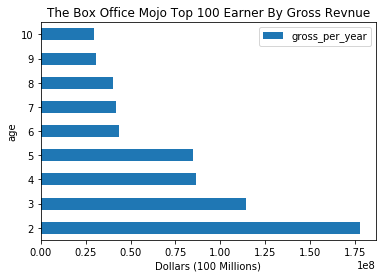

In [29]:
bom_dom_top100 = bom_dom_df[bom_dom_df["title"].isin(bom_title_sort_gross)]
bom_dom_top100.groupby("age").mean()[["gross_per_year"]].plot(kind="barh")
plt.title("The Box Office Mojo Top 100 Earner By Gross Revnue");
plt.xlabel("Dollars (100 Millions)");

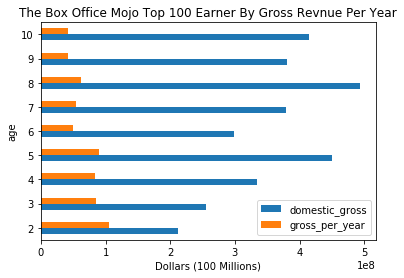

In [28]:
bom_dom_peryr_100 = bom_dom_df[bom_dom_df["title"].isin(bom_title_sort_yr_gross)]
bom_dom_peryr_100.groupby("age").mean()[["domestic_gross", "gross_per_year"]].plot(kind="barh")
plt.title("The Box Office Mojo Top 100 Earner By Gross Revnue Per Year");
plt.xlabel("Dollars (100 Millions)");

### Domestic Gross Revenue Over Time (in Years) of The Numbers data set

In [49]:
#make release year
tn_df["release_year"] = tn_df.release_date.apply(lambda text: int(text[-4:]))

In [50]:
#convert all budgets to int
tn_df.production_budget = tn_df.production_budget.apply(lambda num: int("".join(x for x in num if x.isnumeric())))
tn_df.domestic_gross = tn_df.domestic_gross.apply(lambda num: int("".join(x for x in num if x.isnumeric())))
tn_df.worldwide_gross = tn_df.worldwide_gross.apply(lambda num: int("".join(x for x in num if x.isnumeric())))

In [52]:
tn_df["ww_profit"] = tn_df.worldwide_gross - tn_df.production_budget

In [53]:
tn_df["ww_profit_per_yr"] = tn_df["ww_profit"]/tn_df["release_year"]

In [56]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,ww_profit,ww_profit_per_yr
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,2351345279,1.170406e+06
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,3.157951e+05
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,-9.917665e+04
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,5.322154e+05
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,4.956479e+05


In [55]:
tn_top_profit = tn_df.sort_values("ww_profit", ascending = False)[:100]

In [57]:
tn_top_profit_peryr = tn_df.sort_values("ww_profit_per_yr", ascending = False)[:100]

In [79]:
tn_top_profit.groupby("release_year")[["production_budget","ww_profit"]].describe()

production_budget                                           \
                         count          mean           std          min   
release_year                                                              
1977                       1.0  1.100000e+07           NaN   11000000.0   
1982                       1.0  1.050000e+07           NaN   10500000.0   
1991                       1.0  2.000000e+07           NaN   20000000.0   
1993                       1.0  6.300000e+07           NaN   63000000.0   
1994                       2.0  6.715000e+07  1.718269e+07   55000000.0   
1996                       1.0  7.500000e+07           NaN   75000000.0   
1997                       1.0  2.000000e+08           NaN  200000000.0   
1999                       2.0  7.750000e+07  5.303301e+07   40000000.0   
2001                       2.0  1.170000e+08  1.131371e+07  109000000.0   
2002                       3.0  1.110000e+08  2.443358e+07   94000000.0   
2003                       3.0  1.126667e+08  3.233162e+07   94000000.0   
2004                       4.0  1.062500e+08  7.586995e+07   25000000.0   
2005                       2.0  1.325000e+08  2.474874e+07  115000000.0   
2006                       2.0  1.750000e+08  7.071068e+07  125000000.0   
2007                       4.0  2.170000e+08  7.372923e+07  150000000.0   
2008                       2.0  1.850000e+08  0.000000e+00  185000000.0   
2009                       5.0  2.050000e+08  1.480709e+08   50000000.0   
2010                       6.0  1.530000e+08  5.023943e+07   68000000.0   
2011                       3.0  2.435333e+08  1.488572e+08  125000000.0   
2012                       8.0  1.757750e+08  7.228479e+07   80000000.0   
2013                       6.0  1.610000e+08  5.958188e+07   76000000.0   
2014                       4.0  1.887500e+08  5.359960e+07  125000000.0   
2015                       6.0  2.151000e+08  9.354176e+07   74000000.0   
2016                       9.0  1.708889e+08  6.771899e+07   58000000.0   
2017                      11.0  1.642727e+08  7.927685e+07   35000000.0   
2018                       9.0  1.654444e+08  6.929847e+07   55000000.0   
2019                       1.0  1.750000e+08           NaN  175000000.0   

                                                                 ww_profit  \
                      25%          50%          75%          max     count   
release_year                                                                 
1977           11000000.0   11000000.0   11000000.0   11000000.0       1.0   
1982           10500000.0   10500000.0   10500000.0   10500000.0       1.0   
1991           20000000.0   20000000.0   20000000.0   20000000.0       1.0   
1993           63000000.0   63000000.0   63000000.0   63000000.0       1.0   
1994           61075000.0   67150000.0   73225000.0   79300000.0       2.0   
1996           75000000.0   75000000.0   75000000.0   75000000.0       1.0   
1997          200000000.0  200000000.0  200000000.0  200000000.0       1.0   
1999           58750000.0   77500000.0   96250000.0  115000000.0       2.0   
2001          113000000.0  117000000.0  121000000.0  125000000.0       2.0   
2002           97000000.0  100000000.0  119500000.0  139000000.0       3.0   
2003           94000000.0   94000000.0  122000000.0  150000000.0       3.0   
2004           58750000.0  100000000.0  147500000.0  200000000.0       4.0   
2005          123750000.0  132500000.0  141250000.0  150000000.0       2.0   
2006          150000000.0  175000000.0  200000000.0  225000000.0       2.0   
2007          157500000.0  209000000.0  268500000.0  300000000.0       4.0   
2008          185000000.0  185000000.0  185000000.0  185000000.0       2.0   
2009           90000000.0  210000000.0  250000000.0  425000000.0       5.0   
2010          133750000.0  162500000.0  191250000.0  200000000.0       6.0   
2011          160000000.0  195000000.0  302800000.0  410600000.0       3.0   
2012          125900000.0  172500000.0  231250

In [80]:
check_df = tn_df[tn_df["release_year"]==1997].sort_values("ww_profit", ascending = False)
check_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,ww_profit,ww_profit_per_yr
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1997,2008208395,1.005613e+06
630,31,"May 22, 1997",The Lost World: Jurassic Park,75000000,229086679,618638999,1997,543638999,2.722278e+05
438,39,"Jul 1, 1997",Men in Black,90000000,250690539,587790539,1997,497790539,2.492692e+05
1088,89,"Dec 24, 1997",As Good as it Gets,50000000,148478011,314111923,1997,264111923,1.322543e+05
4589,90,"Aug 13, 1997",The Full Monty,3500000,45950122,261249383,1997,257749383,1.290683e+05
1251,52,"Mar 21, 1997",Liar Liar,45000000,181410615,302710615,1997,257710615,1.290489e+05
1243,44,"Jun 20, 1997",My Best Friend's Wedding,46000000,126813153,298923419,1997,252923419,1.266517e+05
491,92,"Jul 25, 1997",Air Force One,85000000,172956409,315268353,1997,230268353,1.153071e+05
323,24,"Dec 19, 1997",Tomorrow Never Dies,110000000,125304276,339504276,1997,229504276,1.149245e+05
3536,37,"Dec 5, 1997",Good Will Hunting,10000000,138433435,225925989,1997,215925989,1.081252e+05


In [64]:
print(tl.common_in_list(tn_top_profit.movie.values,tn_top_profit_peryr.movie.values)) #100!

100


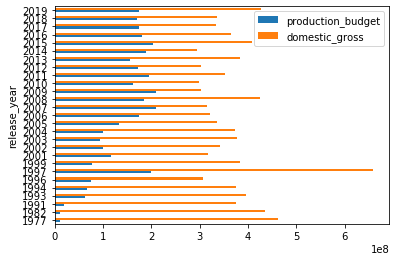

In [76]:
tn_top_profit.groupby("release_year").median()[["production_budget","domestic_gross"]].plot(kind="barh")

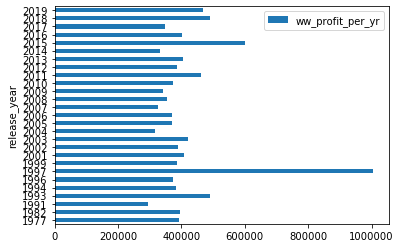

In [73]:
tn_top_profit_peryr.groupby("release_year").median()[["ww_profit_per_yr"]].plot(kind="barh")

<h2 align="center">OLD ANALYSIS</h2>

In [16]:
tn_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


***
***

<h2 align="center"> OLD ANALYSIS</h2>

***
***

In [3]:
df = tl.searchbytitle(bomgr_df, "title", tmdb_check_df, "final_title",["Toy Story 3", "Iron Man 2"])
df.head()

NameError: name 'bomgr_df' is not defined

#### Box Office Mojo

In [5]:
bomgr_df[bomgr_df.title == "Toy Story 3"]

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


In [6]:
tmdb_check_df[tmdb_check_df.final_title == "Toy Story 3"]

NameError: name 'tmdb_check_df' is not defined

In [7]:
bomgr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:

bomgr_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### IMDB

IMDB data set is very separated, but provides with given key.

- imdb.name.basics: name of actor/staff memberds. ID'ed by nconst column and title_id list in known_for titles column
- imdb.title.akas: alternaitve tiltes of movies (title_id_ depending on the region)
- imdb.title.basics: movie title with basic info
- imdb.title.crew: list of directors and writers but ID'ed with nconst
- imdb.principals: principals actors/staffs? "Featuring"?
- imdb.rating: rating and number of reviews

***
#### Merging some IMDB tables for further analysis
***

In [36]:
# To merge, the merging columns need to have same dtype. Run this cell to ensure
i_title_basic_df.tconst.astype(str)
i_rating_df.tconst.astype(str)

0        tt10356526
1        tt10384606
2         tt1042974
3         tt1043726
4         tt1060240
            ...    
73851     tt9805820
73852     tt9844256
73853     tt9851050
73854     tt9886934
73855     tt9894098
Name: tconst, Length: 73856, dtype: object

In [37]:
i_title_rating_df = i_title_basic_df.merge(i_rating_df, on = "tconst")

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [38]:
i_title_rating_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


#### This merge dropped half of the data points! Not all title has ratings

In [39]:
i_title_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [40]:
i_title_rating_df[i_title_rating_df["numvotes"] > 100].sort_values("averagerating", ascending = False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73343,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,9.9,417
65296,tt7131622,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",9.7,5600
71545,tt8718580,Eghantham,Eghantham,2018,125.0,Drama,9.7,639
73062,tt9343826,Ananthu V/S Nusrath,Ananthu V/S Nusrath,2018,149.0,"Comedy,Drama,Family",9.6,808
73583,tt9680166,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624
...,...,...,...,...,...,...,...,...
55323,tt5620038,A Rain Woman,Ame onna,2016,NaN,Horror,1.0,262
13917,tt1945118,In a Lonely Planet,Kodokuna wakusei,2011,94.0,Romance,1.0,433
57307,tt5874352,Utsuroi no hyôhonbako,Utsuroi no hyôhonbako,2016,95.0,Comedy,1.0,205
49011,tt4837074,Ritoru Kyouta no bouken,Ritoru Kyouta no bouken,2017,82.0,Adventure,1.0,174


### Rotten Tomatoes

- rt.movie_info: informatino regarding the movies
- rt.reviews: reviews, but most ratings are in fresh or rotten

In [15]:
rt_info_df.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

Adding fresh_bool column to assign 1 or fresh 0 or rotten

In [ ]:
rt_review_df["fresh_bool"] = rt_review_df["fresh"].apply(lambda txt: 1 if txt == "fresh" else 0)

In [14]:

#thank you Tim Hintz and Eric Roberts for encoding info 
rt_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [ ]:
#sanity check
#rt_review_df.head()

In [ ]:
rt_info_df.id.count() #1135 reviews when grouped by ID

In [16]:

rt_review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [ ]:
rt_review_df.fresh.value_counts()

Calculate the ratio of the movie's "freshness" using the "fresh_bool" column made from above

In [ ]:
rt_review_total = rt_review_df[["id", "fresh_bool"]].groupby("id").count() #tells us how many reviews there are per movide id
rt_review_fresh = rt_review_df[["id", "fresh_bool"]].groupby("id").sum() #tells us how many reviews marked it fresh per movie id
rt_review_fresh_ratio = rt_review_fresh / rt_review_total #vectorized calculation to get ratio
rt_review_fresh_ratio.columns = ["fresh_percent"] #rename the columns to make more sense

In [ ]:
#sanity check
#rt_review_fresh_ratio.head()

In [ ]:
rt_info_review_df = rt_info_df.join(rt_review_fresh_ratio, on="id", how="left")
rt_info_review_df = rt_info_review_df.set_index("id") #set index to movie id for cleaner look

In [ ]:
#sanity check
#rt_info_review_df.head()

In [ ]:
#rt_info_review_df.info() #running to check garbage data

According to the dataframe summary it seems that currency, box_office, and studio has a lot of null values and can be discarded (only ~20-30% complete data)

In [ ]:
rt_info_review_df.drop(["currency", "box_office", "studio"], axis = 1, inplace = True) #YOU CAN ONLY RUN THIS ONCE

In [ ]:
# Run below to fill NaN of runtime with filterable data (9999)
rt_info_review_df.runtime.fillna("9999 minutes", inplace = True) 

In [ ]:
#converting runtime into integer, they should be all in minutes
rt_info_review_df.runtime = rt_info_review_df.runtime.apply(lambda txt: int(txt.split()[0]))

Now that it's a bit cleaner, doing a high level trend summary on runtime versus review

In [ ]:
rt_info_review_df[rt_info_review_df.runtime < 9999].corr() #not much correlation between them

### The Movie Database

In [17]:

tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [18]:
tmdb_check_df = tmdb_df[["original_language", "original_title", "popularity", "release_date", "title", "vote_average", "vote_count"]]

In [19]:
tmdb_check_df.columns = ["org_lang", "org_title", "popularity", "release_date", "final_title", "vote_avg", "vote_count"]

In [20]:
tmdb_check_df.head()

,org_lang,org_title,popularity,release_date,final_title,vote_avg,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### TN is most likely to be "The Numbers" the-numbers.com

In [22]:
tn_budget_df.info() #all budgets are strings initially

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
#using code below for number conversion
int("".join(x for x in "$410,600,000" if x.isnumeric()))

Below changes each columsn to numberic(int64) values.
<br>
#### REMINDER: BELOW CAN ONLY BE RAN ONCE SINCE IT REPLACES THE COLUMN. 
#### IF STRING VALUES ARE NEEDED REASSIGN COLUMNS OR RELOAD DATA

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
tn_budget_df["production_budget"] = tn_budget_df["production_budget"].apply(lambda num: int("".join(x for x in num if x.isnumeric())))

In [24]:
tn_budget_df["domestic_gross"] = tn_budget_df["domestic_gross"].apply(lambda num: int("".join(x for x in num if x.isnumeric())))

In [25]:
tn_budget_df["worldwide_gross"] = tn_budget_df["worldwide_gross"].apply(lambda num: int("".join(x for x in num if x.isnumeric())))

In [26]:
tn_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [27]:
tn_budget_df.corr() #much better

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


According to the correlation table above:

- The movie budget gas a positive correlation to the gross numbers.
- If a movie does well in domestic market, it is very likely to do well in worldwide market (0.94!)

***
## Combining IMDB Rating and The Numbers table

#### i_title_rating_df + tn_budget_df

The joining will occur on the movie title. They will be cleaned for best formatting.

***

In [28]:
tn_i_budget_df = tn_budget_df #making a copy to preserve data

In [29]:
tn_i_budget_df.movie = tn_i_budget_df.movie.apply(lambda txt: "".join(txt.lower().split()))

In [30]:
tn_i_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",piratesofthecaribbean:onstrangertides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",darkphoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers:ageofultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",starwarsep.viii:thelastjedi,317000000,620181382,1316721747


In [31]:
len(tn_i_budget_df.movie.unique())

5698

In [41]:
i_tn_rating_df = i_title_rating_df.drop(["tconst", "primary_title","start_year"], axis = 1)

In [42]:
i_tn_rating_df.columns = ["movie", "runtime", "genres", "rating", "numvotes"]

In [43]:
i_tn_rating_df.movie = i_tn_rating_df.movie.apply(lambda txt: "".join(txt.lower().split()))

In [44]:
i_tn_rating_df.head()

,movie,runtime,genres,rating,numvotes
0,sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,ashadkaekdin,114.0,"Biography,Drama",7.2,43
2,theothersideofthewind,122.0,Drama,6.9,4517
3,sabsebadasukh,NaN,"Comedy,Drama",6.1,13
4,latelenovelaerrante,80.0,"Comedy,Drama,Fantasy",6.5,119


In [45]:
len(i_tn_rating_df.movie.unique())

70944

In [46]:
i_tn_df = i_tn_rating_df.merge(tn_i_budget_df, on="movie").drop_duplicates("movie")

In [47]:
i_tn_df.info() #that is only about 50% of the movies from The Numbers and only 11% of IMDB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2721
Data columns (total 10 columns):
movie                2133 non-null object
runtime              2080 non-null float64
genres               2132 non-null object
rating               2133 non-null float64
numvotes             2133 non-null int64
id                   2133 non-null int64
release_date         2133 non-null object
production_budget    2133 non-null int64
domestic_gross       2133 non-null int64
worldwide_gross      2133 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 183.3+ KB


In [48]:
i_tn_df["profit"] = i_tn_df.worldwide_gross - i_tn_df.production_budget

In [49]:
#sanity check
#i_tn_df.head()

In [50]:
i_tn_df.describe()

,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
count,2080.000000,2133.000000,2.133000e+03,2133.000000,2.133000e+03,2.133000e+03,2.133000e+03,2.133000e+03
mean,103.962981,6.242194,8.310187e+04,50.798406,3.651870e+07,4.480138e+07,1.098687e+08,7.335001e+07
std,18.825394,1.155942,1.451825e+05,28.497336,4.996743e+07,7.508158e+07,2.059273e+08,1.698490e+08
min,5.000000,1.600000,5.000000e+00,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,91.000000,5.600000,1.176000e+03,26.000000,5.000000e+06,5.142370e+05,2.592308e+06,-1.906067e+06
50%,102.000000,6.400000,2.670400e+04,51.000000,1.800000e+07,1.780430e+07,3.168181e+07,1.160399e+07
75%,114.250000,7.000000,9.705500e+04,75.000000,4.450000e+07,5.476749e+07,1.129142e+08,7.137741e+07
max,189.000000,9.200000,1.841066e+06,100.000000,4.106000e+08,7.000596e+08,2.208208e+09,2.008208e+09


***
Checking correlation in the combined data set. Also checking correlation when subsetted by rating

In [51]:
i_tn_df.corr()

,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.263125,0.430062,-0.029784,0.325491,0.275769,0.293765,0.260063
rating,0.263125,1.000000,0.380324,-0.019754,0.158719,0.225422,0.212471,0.210910
numvotes,0.430062,0.380324,1.000000,-0.012313,0.537496,0.624182,0.616233,0.589005
id,-0.029784,-0.019754,-0.012313,1.000000,-0.059026,-0.021024,-0.035214,-0.025329
production_budget,0.325491,0.158719,0.537496,-0.059026,1.000000,0.715940,0.780109,0.651627
domestic_gross,0.275769,0.225422,0.624182,-0.021024,0.715940,1.000000,0.945485,0.935698
worldwide_gross,0.293765,0.212471,0.616233,-0.035214,0.780109,0.945485,1.000000,0.982916
profit,0.260063,0.210910,0.589005,-0.025329,0.651627,0.935698,0.982916,1.000000


In [ ]:
print("movies in this data set", i_tn_df[i_tn_df.rating > 7.5].count()[0])
i_tn_df[i_tn_df.rating > 7.5].corr()

In [ ]:
print("movies in this data set", i_tn_df[i_tn_df.rating > 8].count()[0])
i_tn_df[i_tn_df.rating > 8].corr()

In [ ]:
print("movies in this data set", i_tn_df[i_tn_df.rating > 8.5].count()[0])
i_tn_df[i_tn_df.rating > 8.5].corr()

In [52]:
million_dollar_movie = i_tn_df[i_tn_df["profit"] > 1000000]
print("Movies that made over $1mil in this data set", len(million_dollar_movie))
million_dollar_movie.corr()

Movies that made over $1mil in this data set 1282


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.288608,0.454810,-0.013888,0.311676,0.258334,0.286281,0.257114
rating,0.288608,1.000000,0.422675,-0.040345,0.116608,0.194902,0.185642,0.191009
numvotes,0.454810,0.422675,1.000000,-0.030105,0.490230,0.558495,0.554139,0.530245
id,-0.013888,-0.040345,-0.030105,1.000000,-0.078716,-0.053280,-0.069303,-0.061427
production_budget,0.311676,0.116608,0.490230,-0.078716,1.000000,0.700708,0.785322,0.665753
domestic_gross,0.258334,0.194902,0.558495,-0.053280,0.700708,1.000000,0.935223,0.930460
worldwide_gross,0.286281,0.185642,0.554139,-0.069303,0.785322,0.935223,1.000000,0.984776
profit,0.257114,0.191009,0.530245,-0.061427,0.665753,0.930460,0.984776,1.000000


In [ ]:
hmillion_dollar_movie = i_tn_df[i_tn_df["profit"] > 100000000]
print("Movies that made over $100mil in this data set", len(hmillion_dollar_movie))
hmillion_dollar_movie.corr()

In [ ]:
fhmillion_dollar_movie = i_tn_df[i_tn_df["profit"] > 500000000]
print("Movies that made over $500mil in this data set", len(fhmillion_dollar_movie))
fhmillion_dollar_movie.corr()

In [53]:
budget_rating_75th = i_tn_df[(i_tn_df.rating > 7)&(i_tn_df.production_budget > 40000000)&(i_tn_df.profit > 40000000)].drop_duplicates("movie")
print("There are this many movies in 75th percentile when divided by rating and budget", len(budget_rating_75th))
budget_rating_75th.describe()

There are this many movies in 75th percentile when divided by rating and budget 128


,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
count,128.000000,128.000000,1.280000e+02,128.000000,1.280000e+02,1.280000e+02,1.280000e+02,1.280000e+02
mean,120.148438,7.578906,3.804610e+05,44.890625,1.245081e+08,2.020745e+08,5.250895e+08,4.005814e+08
std,25.968815,0.399932,3.134981e+05,26.426613,6.354279e+07,1.335239e+08,3.512686e+08,3.065307e+08
min,5.000000,7.100000,5.000000e+00,2.000000,4.100000e+07,4.348227e+07,9.765154e+07,4.520382e+07
25%,103.750000,7.275000,1.430725e+05,25.000000,6.800000e+07,1.031885e+08,2.356786e+08,1.562548e+08
50%,120.500000,7.500000,3.343100e+05,41.500000,1.225000e+08,1.710537e+08,4.691839e+08,3.306913e+08
75%,138.500000,7.800000,5.283755e+05,67.250000,1.700000e+08,2.557860e+08,6.979351e+08,5.474193e+08
max,180.000000,8.800000,1.841066e+06,99.000000,3.306000e+08,7.000596e+08,2.048134e+09,1.748134e+09


In [54]:
check = budget_rating_75th.sort_values("profit", ascending = False)


In [55]:
budget_rating_75th.corr()

,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit
runtime,1.000000,0.253300,0.552324,0.065894,0.236879,0.205746,0.254963,0.243071
rating,0.253300,1.000000,0.637039,-0.042761,0.227285,0.224121,0.300072,0.296752
numvotes,0.552324,0.637039,1.000000,-0.046155,0.363495,0.415397,0.443460,0.432831
id,0.065894,-0.042761,-0.046155,1.000000,-0.146487,-0.124184,-0.137365,-0.127048
production_budget,0.236879,0.227285,0.363495,-0.146487,1.000000,0.617264,0.749672,0.651790
domestic_gross,0.205746,0.224121,0.415397,-0.124184,0.617264,1.000000,0.919755,0.926036
worldwide_gross,0.254963,0.300072,0.443460,-0.137365,0.749672,0.919755,1.000000,0.990545
profit,0.243071,0.296752,0.432831,-0.127048,0.651790,0.926036,0.990545,1.000000


In [56]:
topgenres = budget_rating_75th.genres.dropna().unique()

In [57]:
print(unpack_genre(topgenres))

NameError: name 'unpack_genre' is not defined

In [58]:
i_tn_df["earning_ratio"] = i_tn_df.profit / i_tn_df.production_budget
best_budget_ratio = i_tn_df[i_tn_df.earning_ratio > 10].sort_values("earning_ratio", ascending = False)
best_budget_ratio.corr()

,runtime,rating,numvotes,id,production_budget,domestic_gross,worldwide_gross,profit,earning_ratio
runtime,1.000000,0.303648,0.350898,0.050215,0.123125,0.112286,0.159916,0.162187,-0.187890
rating,0.303648,1.000000,0.456829,0.167232,0.105152,0.102958,0.092002,0.090558,-0.181130
numvotes,0.350898,0.456829,1.000000,0.088795,0.241444,0.315855,0.271898,0.273773,-0.166000
id,0.050215,0.167232,0.088795,1.000000,-0.008263,-0.031036,-0.017078,-0.017808,-0.043553
production_budget,0.123125,0.105152,0.241444,-0.008263,1.000000,0.913006,0.968581,0.962866,-0.155281
domestic_gross,0.112286,0.102958,0.315855,-0.031036,0.913006,1.000000,0.950321,0.950751,-0.074508
worldwide_gross,0.159916,0.092002,0.271898,-0.017078,0.968581,0.950321,1.000000,0.999757,-0.081663
profit,0.162187,0.090558,0.273773,-0.017808,0.962866,0.950751,0.999757,1.000000,-0.074894
earning_ratio,-0.187890,-0.181130,-0.166000,-0.043553,-0.155281,-0.074508,-0.081663,-0.074894,1.000000


In [59]:
best_budget_ratio_genres = best_budget_ratio.genres.dropna().unique()

In [62]:
print(tl.unpack_genre(best_budget_ratio_genres))

{'animation': 1, 'sport': 2, 'family': 3, 'documentary': 3, 'music': 4, 'crime': 5, 'sci-fi': 5, 'adventure': 5, 'mystery': 5, 'fantasy': 5, 'romance': 9, 'action': 9, 'biography': 10, 'horror': 11, 'thriller': 12, 'comedy': 13, 'drama': 31}


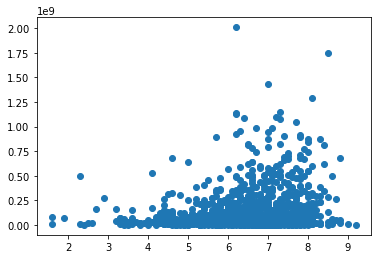

In [63]:
fig, ax = plt.subplots()

x1 = million_dollar_movie.rating
y1 = million_dollar_movie.profit

plt.scatter(x1,y1)

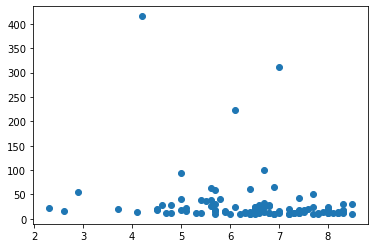

In [64]:
fig, ax = plt.subplots()
x2 = best_budget_ratio.rating
y2 = best_budget_ratio.earning_ratio

plt.scatter(x2,y2)

In [65]:
million_dollar_movie.head()

,movie,runtime,genres,rating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
6,thesecretlifeofwaltermitty,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",91000000,58236838,187861183,96861183
7,awalkamongthetombstones,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",28000000,26017685,62108587,34108587
8,jurassicworld,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",215000000,652270625,1648854864,1433854864
10,thethreestooges,92.0,"Comedy,Family",5.1,28570,4,"Apr 13, 2012",30000000,44338224,54052249,24052249
12,tangled,100.0,"Adventure,Animation,Comedy",7.8,366366,15,"Nov 24, 2010",260000000,200821936,586477240,326477240


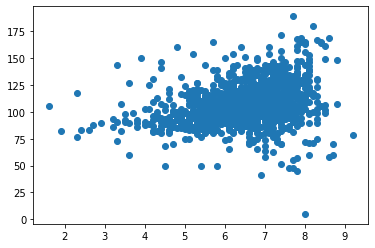

In [67]:
fig, ax = plt.subplots()

x1 = million_dollar_movie.rating
y1 = million_dollar_movie.runtime

plt.scatter(x1,y1)